In [109]:
import numpy as np
%matplotlib inline
from scipy.io import loadmat
import matplotlib.pyplot as plt
from functions import Model, plot_velocity, plot_stacking_chart, TimeAxis, RickerSource, Receiver
from devito import TimeFunction
from devito import Eq, solve
from devito import Operator
from scipy.io import savemat
import os
import imageio

In [110]:
model_reshaped = np.load('data/reshaped3dmodel.npy')
shape = (101,101,101)

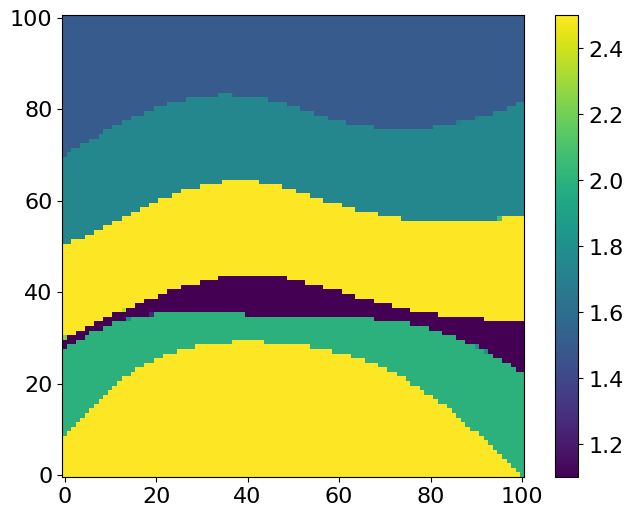

In [111]:
plt.imshow(model_reshaped[50].T, cmap='viridis', origin='lower')
plt.colorbar()
plt.show()

In [112]:
model_reshaped[50].T.shape

(101, 101)

In [113]:
model = Model(vp=model_reshaped, origin=(0., 0., -1000), spacing=(10., 10., 10.), shape=shape, nbl=30, space_order=4, bcs="damp")

Operator `initdamp` ran in 0.01 s


In [114]:
L = 600 # Length line of receivers
x0 = 0 # Initial position

num_sources = 11

sx_line = np.linspace(x0,L+x0,num=num_sources)

num_receivers = 301

rec_line = np.linspace(x0,L+x0,num=num_receivers)

print(np.diff(rec_line), len(rec_line))  

print(np.diff(sx_line), len(sx_line))  

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 301
[60. 60. 60. 60. 60. 60. 60. 60. 60. 60.] 11


In [115]:
num_rec_lines = 31

num_sx_lines = 16

rec_lines = np.linspace(x0,L+x0,num=num_rec_lines)

sx_lines = np.linspace(x0,L+x0,num=num_sx_lines)

print(np.diff(rec_lines), len(rec_lines))  
print(np.diff(sx_lines), len(sx_lines)) 

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.] 31
[40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.] 16


(31, 301)
[[  0.   2.   4. ... 596. 598. 600.]
 [  0.   2.   4. ... 596. 598. 600.]
 [  0.   2.   4. ... 596. 598. 600.]
 ...
 [  0.   2.   4. ... 596. 598. 600.]
 [  0.   2.   4. ... 596. 598. 600.]
 [  0.   2.   4. ... 596. 598. 600.]]


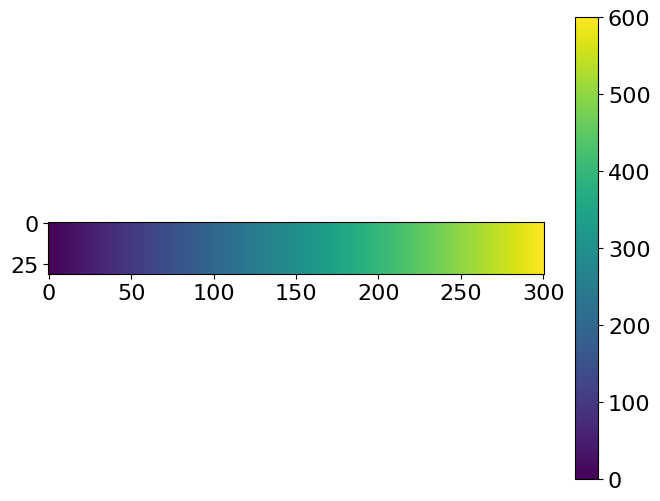

In [116]:
matriz_rec = np.zeros((num_rec_lines,len(rec_line)))

     
for i in range(num_rec_lines):
    for j in range(len(rec_line)):
        matriz_rec[i,j] = rec_line[j]
        
print(matriz_rec.shape)
print(matriz_rec)
plt.imshow(matriz_rec)
plt.colorbar()

(11, 16)
[[600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
  600. 600.]
 [540. 540. 540. 540. 540. 540. 540. 540. 540. 540. 540. 540. 540. 540.
  540. 540.]
 [480. 480. 480. 480. 480. 480. 480. 480. 480. 480. 480. 480. 480. 480.
  480. 480.]
 [420. 420. 420. 420. 420. 420. 420. 420. 420. 420. 420. 420. 420. 420.
  420. 420.]
 [360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
  360. 360.]
 [300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 300.
  300. 300.]
 [240. 240. 240. 240. 240. 240. 240. 240. 240. 240. 240. 240. 240. 240.
  240. 240.]
 [180. 180. 180. 180. 180. 180. 180. 180. 180. 180. 180. 180. 180. 180.
  180. 180.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
  120. 120.]
 [ 60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.  60.
   60.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]


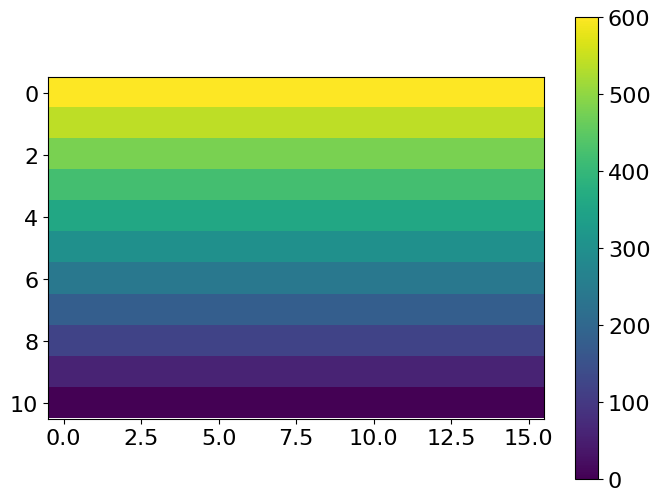

In [117]:
matriz_sx = np.zeros((len(sx_line),num_sx_lines))
print(matriz_sx.shape)

for i in range(len(sx_line)):  
    for j in range(num_sx_lines):
        matriz_sx[len(sx_line)-i-1,j] = sx_line[i]
        

print(matriz_sx)
plt.imshow(matriz_sx)
plt.colorbar()

Text(0, 0.5, 'Distance Y (m)')

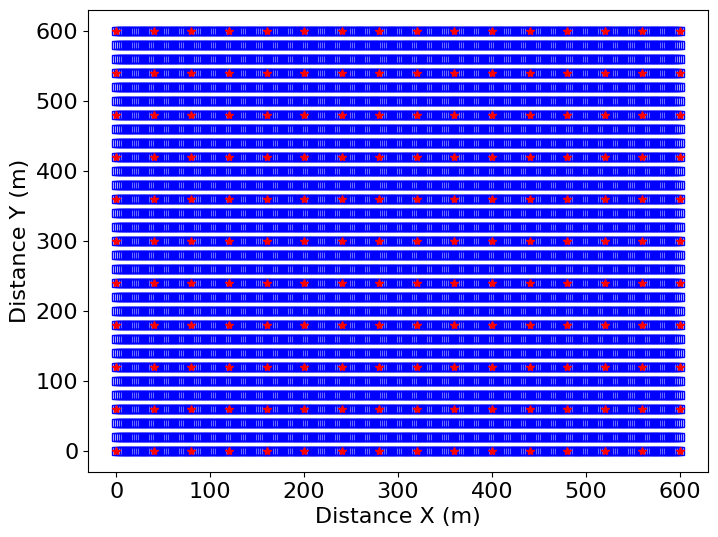

In [118]:
# enumerar estaciones de abajo hacia arriba, disparo cada 4 estaciones
# 31 estaciones por cada linea de disparos
# 301 receptores, 31*301
plt.figure()

for i in range(num_rec_lines):
    for j in range(len(rec_line)):
        plt.plot(rec_line[j],rec_lines[i],'bs',mfc='none')
        
for i in range(num_sx_lines):
    for j in range(len(sx_line)):
        plt.plot(sx_lines[i],sx_line[j],'r*')
        
plt.xlabel('Distance X (m)')
plt.ylabel('Distance Y (m)')

In [34]:
estaciones = []
e0 = 1

for i in range(301):
    estaciones.append(e0)
    e0 = e0 + 31

len(estaciones)
estaciones[50]

1551

In [24]:
x=2
y=11


if y<3:
    en = (((x-1)*20)-50)*31#definir el maximo en x
    if x<4:
        en = 0
        
if y>3:
    en = ((y-1)*3)-5 + (((x-1)*20)-50)*31    
    if x<4:
        en = ((y-1)*3)-5
    
print(en)

25


In [87]:
ffid = 1
j = 51
gy = 0
sy = 0


numlines = ((sy-gy)/20) + 6
tracenum = (j*numlines)+1
        
print(tracenum,numlines)

307.0 6.0


In [88]:
gy = 0
sy = 60

numlines = ((sy-gy)/20) + 6
tracenum = (j*numlines)+1 + tracenum 

        
print(tracenum,numlines)


767.0 9.0


In [142]:
y = 10

31-(((y-1)*3)-5)



9

In [121]:
i = 8
j = 0

SX = matriz_sx[len(sx_line)-i-1,j]

mid_point_rec = [i*3,j*20] 

xindex = mid_point_rec[1]

yindex = mid_point_rec[0]

movyles = 5
movyplus = 6

movxles = 50
movxplus = 51

y1=yindex-movyles
y2=yindex+movyplus
x1=xindex-movxles
x2=xindex+movxplus

if yindex-movyles<=0:
    y1 = 0
    
if yindex+movyplus>30:
    y2 = 31
    
#revisar movimiento
if xindex-movxles<=0:
    x1 = 0
    
if xindex+movxplus>300:
    x2 = 301

receivers_aqc = matriz_rec[y1:y2,x1:x2]

inicial = np.zeros((len(receivers_aqc[0,:])))+y1*np.diff(rec_lines)[0]
final = np.ones((len(receivers_aqc[0,:])))*(len(receivers_aqc[:,0])-1)*np.diff(rec_lines)[0]+y1*np.diff(rec_lines)[0]

line_rec_x = receivers_aqc[0,:]
line_rec_y = np.linspace(inicial[0],final[0],len(receivers_aqc[:,0]))  

sx_x = (j*int(np.diff(sx_lines)[0]))  
sx_y = SX

print(line_rec_x,len(line_rec_x))
print(line_rec_y,len(line_rec_y))

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.] 51
[380. 400. 420. 440. 460. 480. 500. 520. 540. 560. 580.] 11


In [122]:
t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

#Source

f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
src = RickerSource(name='src', grid=model.grid, f0=f0, npoint=1, time_range=time_range)
src.coordinates.data[0, 0] = sx_x
src.coordinates.data[0, 1] = sx_y
src.coordinates.data[0, -1] = 20.  # Depth is 20m

#Receiver
num_receivers = len(line_rec_x)
num_lines = len(line_rec_y)

rec = Receiver(name='rec', grid=model.grid, npoint=num_receivers*num_lines, time_range=time_range)
for i in range(num_lines):
    rec.coordinates.data[i*num_receivers:(i+1)*num_receivers, 0] = line_rec_x  
    rec.coordinates.data[i*num_receivers:(i+1)*num_receivers, 1] = line_rec_y[i]   
    print(line_rec_y[i])
rec.coordinates.data[:, -1] = 20. # Depth is 20m


380.0
400.0
420.0
440.0
460.0
480.0
500.0
520.0
540.0
560.0
580.0


In [123]:
dt

1.811

In [124]:
# Define the wavefield with the size of the model
u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=4)
u

u(t, x, y, z)

In [125]:
u.data.shape

(3, 161, 161, 161)

In [126]:
u.shape == u.data.shape

True

In [127]:
isinstance(u.data, np.ndarray)

True

In [128]:
u.dx2.evaluate

-2.5*u(t, x, y, z)/h_x**2 - 0.0833333333*u(t, x - 2*h_x, y, z)/h_x**2 + 1.33333333*u(t, x - h_x, y, z)/h_x**2 + 1.33333333*u(t, x + h_x, y, z)/h_x**2 - 0.0833333333*u(t, x + 2*h_x, y, z)/h_x**2

In [129]:
# We can now write the PDE
pde = model.m * u.dt2 - u.laplace + model.damp * u.dt

# The PDE representation is as on paper
pde

damp(x, y, z)*Derivative(u(t, x, y, z), t) - Derivative(u(t, x, y, z), (x, 2)) - Derivative(u(t, x, y, z), (y, 2)) - Derivative(u(t, x, y, z), (z, 2)) + Derivative(u(t, x, y, z), (t, 2))/vp(x, y, z)**2

In [130]:
u.forward

u(t + dt, x, y, z)

In [131]:
u.forward.dx

Derivative(u(t + dt, x, y, z), x)

In [132]:
stencil = Eq(u.forward, solve(pde, u.forward))
stencil

Eq(u(t + dt, x, y, z), (-(-2.0*u(t, x, y, z)/dt**2 + u(t - dt, x, y, z)/dt**2)/vp(x, y, z)**2 + Derivative(u(t, x, y, z), (x, 2)) + Derivative(u(t, x, y, z), (y, 2)) + Derivative(u(t, x, y, z), (z, 2)) + damp(x, y, z)*u(t, x, y, z)/dt)/(damp(x, y, z)/dt + 1/(dt**2*vp(x, y, z)**2)))

In [133]:
# Finally we define the source injection and receiver read function to generate the corresponding code
src_term = src.inject(field=u.forward, expr=src * dt**2 / model.m)

# Create interpolation expression for receivers
rec_term = rec.interpolate(expr=u.forward)

In [134]:
op = Operator([stencil] + src_term + rec_term, subs=model.spacing_map)

In [135]:
op(time=time_range.num-1, dt=model.critical_dt)

Operator `Kernel` ran in 4.00 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=3.9810010000000005, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.0006980000000000086, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.014467000000000075, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

In [136]:
print(rec.data.shape) # 10,10,10 posición (4,10)

(554, 561)


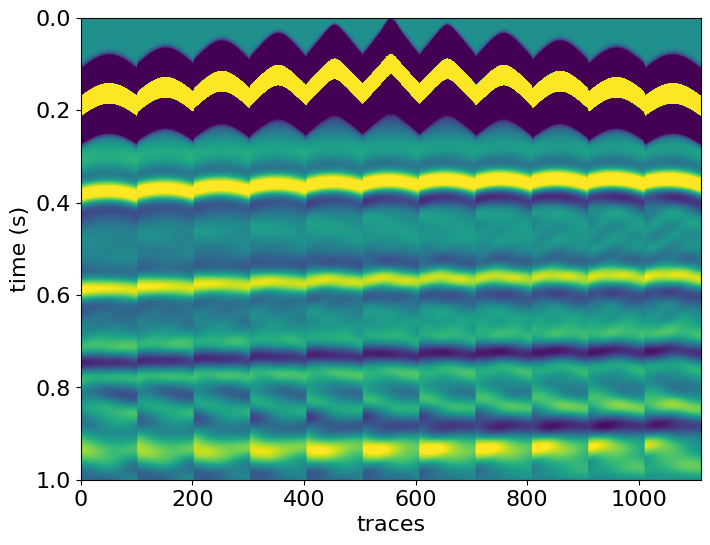

In [25]:
plt.imshow(rec.data, cmap='viridis', aspect='auto', extent=(0,rec.data.shape[1],1,0), vmax=0.01, vmin=-0.01)
plt.xlabel('traces')
plt.ylabel('time (s)')
plt.show()

In [137]:
def model_3d(): 
    
    survey = []
    acq_geometry = []
    sx_list = []
    
    ffid = 0
    
    for j in range(num_sx_lines):
        for i in range(len(sx_line)):  
            SX = matriz_sx[len(sx_line)-i-1,j]

            mid_point_rec = [i*3,j*20] 

            xindex = mid_point_rec[1]

            yindex = mid_point_rec[0]

            movyles = 5
            movyplus = 6

            movxles = 50
            movxplus = 51

            y1=yindex-movyles
            y2=yindex+movyplus
            x1=xindex-movxles
            x2=xindex+movxplus

            if yindex-movyles<=0:
                y1 = 0

            if yindex+movyplus>30:
                y2 = 31

            #revisar movimiento
            if xindex-movxles<=0:
                x1 = 0

            if xindex+movxplus>300:
                x2 = 301

            receivers_aqc = matriz_rec[y1:y2,x1:x2]


            inicial = np.zeros((len(receivers_aqc[0,:])))+y1*np.diff(rec_lines)[0]
            final = np.ones((len(receivers_aqc[0,:])))*(len(receivers_aqc[:,0])-1)*np.diff(rec_lines)[0]+y1*np.diff(rec_lines)[0]

            line_rec_x = receivers_aqc[0,:]
            line_rec_y = np.linspace(inicial[0],final[0],len(receivers_aqc[:,0]))  

            sx_x = (j*int(np.diff(sx_lines)[0]))  
            sx_y = SX

            acq_geometry.append([line_rec_x,line_rec_y])
            sx_list.append([sx_x,sx_y]) 
            
            t0 = 0.  # Simulation starts a t=0
            tn = 1000.  # Simulation last 1 second (1000 ms)
            dt = model.critical_dt  # Time step from model grid spacing

            time_range = TimeAxis(start=t0, stop=tn, step=dt)

            #Source

            f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
            src = RickerSource(name='src', grid=model.grid, f0=f0, npoint=1, time_range=time_range)
            src.coordinates.data[0, 0] = sx_x
            src.coordinates.data[0, 1] = sx_y
            src.coordinates.data[0, -1] = 20.  # Depth is 20m

            #Receiver
            num_receivers = len(line_rec_x)
            num_lines = len(line_rec_y)

            rec = Receiver(name='rec', grid=model.grid, npoint=num_receivers*num_lines, time_range=time_range)
            
            for k in range(num_lines):
                rec.coordinates.data[k*num_receivers:(k+1)*num_receivers, 0] = line_rec_x  
                rec.coordinates.data[k*num_receivers:(k+1)*num_receivers, 1] = line_rec_y[k]   
                
            rec.coordinates.data[:, -1] = 20. # Depth is 20m
            
            # Define the wavefield with the size of the model
            u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=4)
            
            # We can now write the PDE
            pde = model.m * u.dt2 - u.laplace + model.damp * u.dt
            
            stencil = Eq(u.forward, solve(pde, u.forward))
            
            # Finally we define the source injection and receiver read function to generate the corresponding code
            src_term = src.inject(field=u.forward, expr=src * dt**2 / model.m)

            # Create interpolation expression for receivers
            rec_term = rec.interpolate(expr=u.forward)
            
            op = Operator([stencil] + src_term + rec_term, subs=model.spacing_map)
            
            op(time=time_range.num-1, dt=model.critical_dt)
            
            survey.append(rec.data)
            
            ffid +=1
            
            print('FFID: ',ffid)
            
    return survey, acq_geometry, sx_list

In [138]:
survey, acq_geometry, sx_list = model_3d()

Operator `Kernel` ran in 3.95 s


FFID:  1


Operator `Kernel` ran in 4.23 s


FFID:  2


Operator `Kernel` ran in 3.96 s


FFID:  3


Operator `Kernel` ran in 4.29 s


FFID:  4


Operator `Kernel` ran in 4.03 s


FFID:  5


Operator `Kernel` ran in 4.20 s


FFID:  6


Operator `Kernel` ran in 4.23 s


FFID:  7


Operator `Kernel` ran in 4.08 s


FFID:  8


Operator `Kernel` ran in 4.14 s


FFID:  9


Operator `Kernel` ran in 4.05 s


FFID:  10


Operator `Kernel` ran in 3.88 s


FFID:  11


Operator `Kernel` ran in 4.10 s


FFID:  12


Operator `Kernel` ran in 4.25 s


FFID:  13


Operator `Kernel` ran in 3.93 s


FFID:  14


Operator `Kernel` ran in 4.25 s


FFID:  15


Operator `Kernel` ran in 4.18 s


FFID:  16


Operator `Kernel` ran in 4.53 s


FFID:  17


Operator `Kernel` ran in 4.12 s


FFID:  18


Operator `Kernel` ran in 4.36 s


FFID:  19


Operator `Kernel` ran in 4.09 s


FFID:  20


Operator `Kernel` ran in 4.19 s


FFID:  21


Operator `Kernel` ran in 4.42 s


FFID:  22


Operator `Kernel` ran in 4.11 s


FFID:  23


Operator `Kernel` ran in 4.21 s


FFID:  24


Operator `Kernel` ran in 4.02 s


FFID:  25


Operator `Kernel` ran in 4.37 s


FFID:  26


Operator `Kernel` ran in 4.23 s


FFID:  27


Operator `Kernel` ran in 4.07 s


FFID:  28


Operator `Kernel` ran in 4.33 s


FFID:  29


Operator `Kernel` ran in 4.03 s


FFID:  30


Operator `Kernel` ran in 4.18 s


FFID:  31


Operator `Kernel` ran in 4.39 s


FFID:  32


Operator `Kernel` ran in 4.53 s


FFID:  33


Operator `Kernel` ran in 4.28 s


FFID:  34


Operator `Kernel` ran in 4.35 s


FFID:  35


Operator `Kernel` ran in 4.08 s


FFID:  36


Operator `Kernel` ran in 5.06 s


FFID:  37


Operator `Kernel` ran in 4.61 s


FFID:  38


Operator `Kernel` ran in 4.76 s


FFID:  39


Operator `Kernel` ran in 4.69 s


FFID:  40


Operator `Kernel` ran in 5.19 s


FFID:  41


Operator `Kernel` ran in 4.84 s


FFID:  42


Operator `Kernel` ran in 4.45 s


FFID:  43


Operator `Kernel` ran in 4.15 s


FFID:  44


Operator `Kernel` ran in 4.31 s


FFID:  45


Operator `Kernel` ran in 4.16 s


FFID:  46


Operator `Kernel` ran in 4.16 s


FFID:  47


Operator `Kernel` ran in 4.21 s


FFID:  48


Operator `Kernel` ran in 4.38 s


FFID:  49


Operator `Kernel` ran in 4.05 s


FFID:  50


Operator `Kernel` ran in 4.06 s


FFID:  51


Operator `Kernel` ran in 3.94 s


FFID:  52


Operator `Kernel` ran in 3.91 s


FFID:  53


Operator `Kernel` ran in 4.01 s


FFID:  54


Operator `Kernel` ran in 4.02 s


FFID:  55


Operator `Kernel` ran in 3.92 s


FFID:  56


Operator `Kernel` ran in 4.25 s


FFID:  57


Operator `Kernel` ran in 4.04 s


FFID:  58


Operator `Kernel` ran in 4.04 s


FFID:  59


Operator `Kernel` ran in 4.19 s


FFID:  60


Operator `Kernel` ran in 4.00 s


FFID:  61


Operator `Kernel` ran in 4.15 s


FFID:  62


Operator `Kernel` ran in 4.06 s


FFID:  63


Operator `Kernel` ran in 4.06 s


FFID:  64


Operator `Kernel` ran in 4.13 s


FFID:  65


Operator `Kernel` ran in 4.08 s


FFID:  66


Operator `Kernel` ran in 4.15 s


FFID:  67


Operator `Kernel` ran in 4.12 s


FFID:  68


Operator `Kernel` ran in 4.08 s


FFID:  69


Operator `Kernel` ran in 4.21 s


FFID:  70


Operator `Kernel` ran in 4.16 s


FFID:  71


Operator `Kernel` ran in 4.17 s


FFID:  72


Operator `Kernel` ran in 4.29 s


FFID:  73


Operator `Kernel` ran in 4.27 s


FFID:  74


Operator `Kernel` ran in 4.22 s


FFID:  75


Operator `Kernel` ran in 4.16 s


FFID:  76


Operator `Kernel` ran in 4.05 s


FFID:  77


Operator `Kernel` ran in 4.05 s


FFID:  78


Operator `Kernel` ran in 4.16 s


FFID:  79


Operator `Kernel` ran in 4.12 s


FFID:  80


Operator `Kernel` ran in 4.12 s


FFID:  81


Operator `Kernel` ran in 4.09 s


FFID:  82


Operator `Kernel` ran in 4.04 s


FFID:  83


Operator `Kernel` ran in 4.14 s


FFID:  84


Operator `Kernel` ran in 4.18 s


FFID:  85


Operator `Kernel` ran in 4.06 s


FFID:  86


Operator `Kernel` ran in 4.02 s


FFID:  87


Operator `Kernel` ran in 3.98 s


FFID:  88


Operator `Kernel` ran in 4.01 s


FFID:  89


Operator `Kernel` ran in 4.28 s


FFID:  90


Operator `Kernel` ran in 4.11 s


FFID:  91


Operator `Kernel` ran in 4.07 s


FFID:  92


Operator `Kernel` ran in 4.00 s


FFID:  93


Operator `Kernel` ran in 4.08 s


FFID:  94


Operator `Kernel` ran in 4.17 s


FFID:  95


Operator `Kernel` ran in 4.20 s


FFID:  96


Operator `Kernel` ran in 3.98 s


FFID:  97


Operator `Kernel` ran in 4.13 s


FFID:  98


Operator `Kernel` ran in 4.11 s


FFID:  99


Operator `Kernel` ran in 4.14 s


FFID:  100


Operator `Kernel` ran in 4.03 s


FFID:  101


Operator `Kernel` ran in 4.09 s


FFID:  102


Operator `Kernel` ran in 4.12 s


FFID:  103


Operator `Kernel` ran in 4.10 s


FFID:  104


Operator `Kernel` ran in 4.06 s


FFID:  105


Operator `Kernel` ran in 4.06 s


FFID:  106


Operator `Kernel` ran in 4.22 s


FFID:  107


Operator `Kernel` ran in 4.06 s


FFID:  108


Operator `Kernel` ran in 4.04 s


FFID:  109


Operator `Kernel` ran in 4.13 s


FFID:  110


Operator `Kernel` ran in 3.99 s


FFID:  111


Operator `Kernel` ran in 4.15 s


FFID:  112


Operator `Kernel` ran in 4.17 s


FFID:  113


Operator `Kernel` ran in 3.98 s


FFID:  114


Operator `Kernel` ran in 4.26 s


FFID:  115


Operator `Kernel` ran in 3.95 s


FFID:  116


Operator `Kernel` ran in 4.07 s


FFID:  117


Operator `Kernel` ran in 4.20 s


FFID:  118


Operator `Kernel` ran in 3.94 s


FFID:  119


Operator `Kernel` ran in 4.04 s


FFID:  120


Operator `Kernel` ran in 4.12 s


FFID:  121


Operator `Kernel` ran in 4.14 s


FFID:  122


Operator `Kernel` ran in 4.01 s


FFID:  123


Operator `Kernel` ran in 4.31 s


FFID:  124


Operator `Kernel` ran in 4.33 s


FFID:  125


Operator `Kernel` ran in 4.39 s


FFID:  126


Operator `Kernel` ran in 4.35 s


FFID:  127


Operator `Kernel` ran in 4.67 s


FFID:  128


Operator `Kernel` ran in 4.68 s


FFID:  129


Operator `Kernel` ran in 4.49 s


FFID:  130


Operator `Kernel` ran in 4.28 s


FFID:  131


Operator `Kernel` ran in 4.47 s


FFID:  132


Operator `Kernel` ran in 4.36 s


FFID:  133


Operator `Kernel` ran in 4.70 s


FFID:  134


Operator `Kernel` ran in 5.14 s


FFID:  135


Operator `Kernel` ran in 4.25 s


FFID:  136


Operator `Kernel` ran in 4.50 s


FFID:  137


Operator `Kernel` ran in 5.01 s


FFID:  138


Operator `Kernel` ran in 4.55 s


FFID:  139


Operator `Kernel` ran in 4.45 s


FFID:  140


Operator `Kernel` ran in 4.64 s


FFID:  141


Operator `Kernel` ran in 4.91 s


FFID:  142


Operator `Kernel` ran in 4.49 s


FFID:  143


Operator `Kernel` ran in 4.39 s


FFID:  144


Operator `Kernel` ran in 4.54 s


FFID:  145


Operator `Kernel` ran in 4.50 s


FFID:  146


Operator `Kernel` ran in 4.35 s


FFID:  147


Operator `Kernel` ran in 4.27 s


FFID:  148


Operator `Kernel` ran in 4.60 s


FFID:  149


Operator `Kernel` ran in 4.52 s


FFID:  150


Operator `Kernel` ran in 4.33 s


FFID:  151


Operator `Kernel` ran in 4.18 s


FFID:  152


Operator `Kernel` ran in 4.35 s


FFID:  153


Operator `Kernel` ran in 5.10 s


FFID:  154


Operator `Kernel` ran in 4.60 s


FFID:  155


Operator `Kernel` ran in 4.43 s


FFID:  156


Operator `Kernel` ran in 4.29 s


FFID:  157


Operator `Kernel` ran in 4.25 s


FFID:  158


Operator `Kernel` ran in 4.45 s


FFID:  159


Operator `Kernel` ran in 4.32 s


FFID:  160


Operator `Kernel` ran in 4.53 s


FFID:  161


Operator `Kernel` ran in 4.64 s


FFID:  162


Operator `Kernel` ran in 4.24 s


FFID:  163


Operator `Kernel` ran in 4.44 s


FFID:  164


Operator `Kernel` ran in 4.35 s


FFID:  165


Operator `Kernel` ran in 4.27 s


FFID:  166


Operator `Kernel` ran in 4.51 s


FFID:  167


Operator `Kernel` ran in 4.37 s


FFID:  168


Operator `Kernel` ran in 4.26 s


FFID:  169


Operator `Kernel` ran in 4.40 s


FFID:  170


Operator `Kernel` ran in 4.73 s


FFID:  171


Operator `Kernel` ran in 4.64 s


FFID:  172


Operator `Kernel` ran in 4.14 s


FFID:  173


Operator `Kernel` ran in 4.13 s


FFID:  174


Operator `Kernel` ran in 4.31 s


FFID:  175


Operator `Kernel` ran in 4.14 s


FFID:  176


In [139]:
print(len(survey))

176


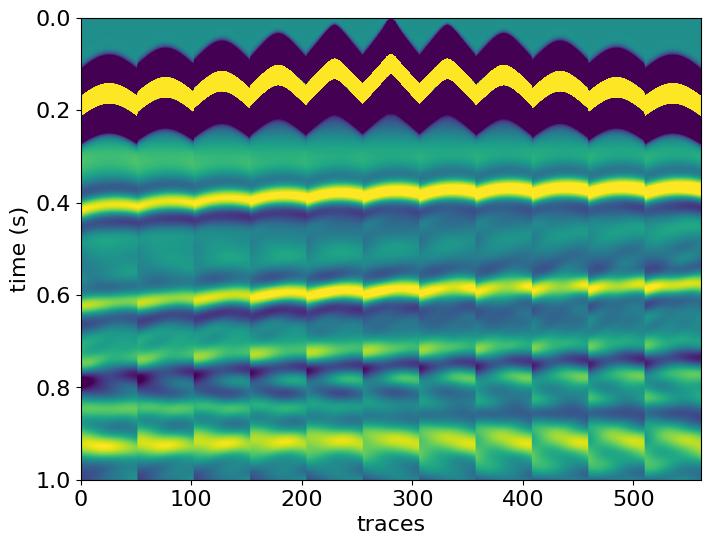

In [146]:
plt.imshow(survey[80], cmap='viridis', aspect='auto', extent=(0,rec.data.shape[1],1,0), vmax=0.01, vmin=-0.01)
plt.xlabel('traces')
plt.ylabel('time (s)')
plt.show()

In [141]:
for i in range(len(survey)): 
    np.savetxt('data/datatxt/file_'+str(i+1)+'.txt',survey[i].T.ravel())

In [35]:
survey[1].shape

(554, 459)